In [1]:
env = "Hopper-v2"
alg = "gaifo"
opponent = "PPO"
seeds = "_2_3_4_"
friction = False
best = False
include_PPO = False

In [2]:
import pickle
import sys
sys.path.insert(0, "../../PyTorch-RL/")
from utils import plot
import numpy as np

In [3]:
## Evaluate on M^E

In [4]:

with open("DataCompareAlphas" + env + seeds + "frictionFalseexpertMEeval_small_range.p", "rb") as f: #DataCompareAlphasHalfCheetah-v2['40', '41']frictionFalseexpertMEeval_small_range
    data = pickle.load(f)
with open("DataCompareAlphas" + env + seeds + "frictionFalseexpertMEeval_small_range1_25.p", "rb") as f: #DataCompareAlphasHalfCheetah-v2['40', '41']frictionFalseexpertMEeval_small_range
    data1_25 = pickle.load(f)

In [5]:
lines, std, labels = data[0], data[1], data[2]
lines1_25, std1_25, labels1_25 = data1_25[0], data1_25[1], data1_25[2]
new_labels = [ "1.0", "0.999", "0.99", "0.98", "0.97", "0.96", "0.95", "0.9", "expert"]
first = lines.pop(0)
lines.append(first)
first = std.pop(0)
std.append(first)
first = lines1_25.pop(0)
lines1_25.append(first)
first = std1_25.pop(0)
std1_25.append(first)
lines = list(np.hstack([np.array(lines)[:, :3], np.array(lines1_25), np.array(lines)[:, 3:]]))
std = list(np.hstack([np.array(std)[:, :3], np.array(std1_25), np.array(std)[:, 3:]]))
with open("DataCompareAlphas" + env + seeds + "frictionFalseexpertMEeval_small_range_join.p", "wb") as f: #DataCompareAlphasHalfCheetah-v2['40', '41']frictionFalseexpertMEeval_small_range
    pickle.dump((lines, std, labels), f)

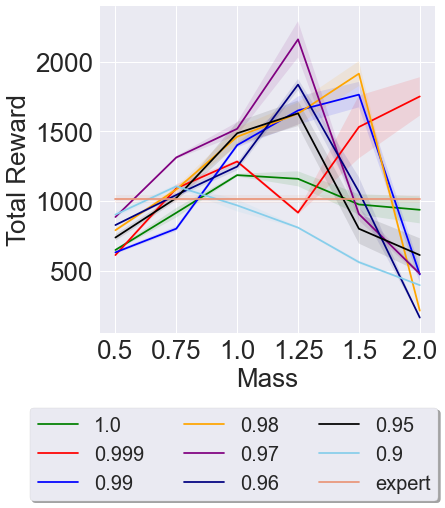

In [7]:
plot.plot_lines_and_ranges(list_to_plot=lines,
                           list_sigmas=std,
                           list_name= new_labels,
                           axis_label=["Mass", "Total Reward"] if not friction else ["Friction", "Total Reward"],
                           folder="../",
                           title="gaifo"+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrue1_25",
                           x_axis=["0.5", "0.75", "1.0", "1.25", "1.5", "2.0"],
                           legend = True)

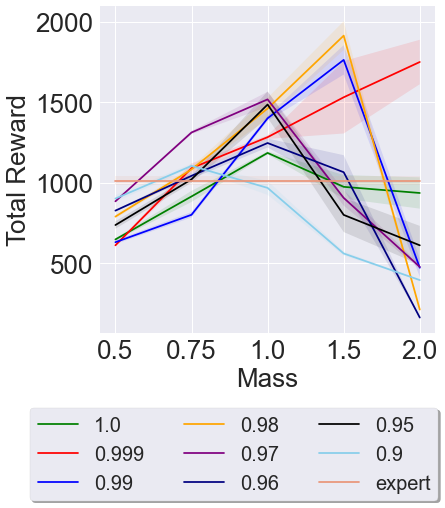

In [12]:
plot.plot_lines_and_ranges(list_to_plot=lines,
                           list_sigmas=std,
                           list_name= new_labels,
                           axis_label=["Mass", "Total Reward"] if not friction else ["Friction", "Total Reward"],
                           folder="../",
                           title="gaifo"+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrue",
                           x_axis=["0.5", "0.75", "1.0", "1.5", "2.0"],
                           legend = True)

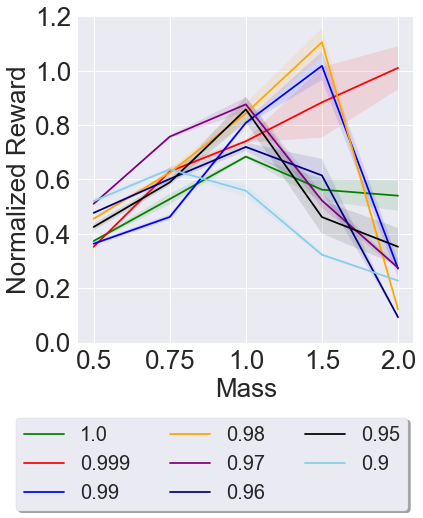

In [13]:
with open("DataCompareAlphas" + env + seeds + "frictionFalseexpertMEeval_small_range.p", "rb") as f: #DataCompareAlphasHalfCheetah-v2['40', '41']frictionFalseexpertMEeval_small_range
    data = pickle.load(f)
lines, std, labels = data[0], data[1], data[2]
new_labels = [ "1.0", "0.999", "0.99", "0.98", "0.97", "0.96", "0.95", "0.9"]
lines.pop(0)
std.pop(0)
reward_max = 1733.
random_min = 1.
delta = reward_max -random_min
for j,item in enumerate(zip(lines, std)):
    lines[j] = item[0]/delta - random_min/delta 
    std[j] = item[1]/delta - random_min/delta 
plot.plot_lines_and_ranges(list_to_plot=lines,
                           list_sigmas=std,
                           list_name= new_labels,
                           axis_label=["Mass", "Normalized Reward"] if not friction else ["Friction", "Normalized Reward"],
                           folder="../",
                           title=alg+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrueNormalized",
                           x_axis=["0.5", "0.75", "1.0", "1.5", "2.0"],
                           legend = True,
                           ylim=[0,1.2])

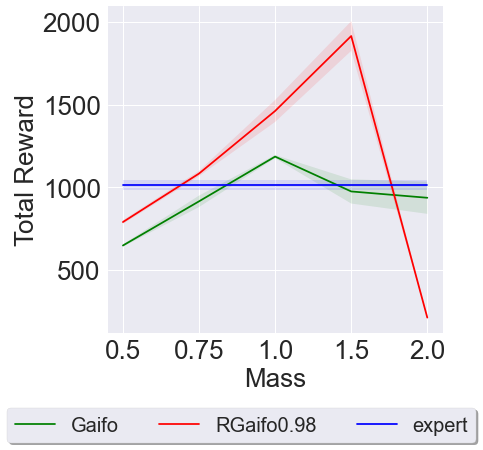

In [15]:
with open("DataCompareAlphas" + env + seeds + "frictionFalseexpertMEeval_small_range.p", "rb") as f: #DataCompareAlphasHalfCheetah-v2['40', '41']frictionFalseexpertMEeval_small_range
    data = pickle.load(f)
lines, std, labels = data[0], data[1], data[2]
new_labels = [ "1.0", "0.999", "0.99", "0.98", "0.97", "0.96", "0.95", "0.9", "expert"]
first = lines.pop(0)
lines.append(first)
first = std.pop(0)
std.append(first)
plot.plot_lines_and_ranges(list_to_plot=[lines[0]]+[lines[3]]+[lines[-1]],
                           list_sigmas=[std[0]] + [std[3]] + [std[-1]],
                           list_name= ["Gaifo"] + ["RGaifo" + new_labels[3]] + [new_labels[-1]],
                           axis_label=["Mass", "Total Reward"] if not friction else ["Friction", "Total Reward"],
                           folder="../",
                           title="gaifo"+ env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrueBest",
                           x_axis=["0.5", "0.75", "1.0", "1.5", "2.0"],
                           legend = True)

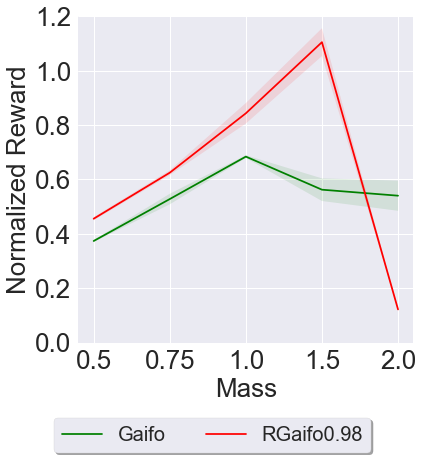

In [17]:
with open("DataCompareAlphas" + env + seeds + "frictionFalseexpertMEeval_small_range.p", "rb") as f: #DataCompareAlphasHalfCheetah-v2['40', '41']frictionFalseexpertMEeval_small_range
    data = pickle.load(f)
lines, std, labels = data[0], data[1], data[2]
new_labels = [ "1.0", "0.999", "0.99", "0.98", "0.97", "0.96", "0.95", "0.9"]
lines.pop(0)
std.pop(0)
reward_max = 1733.
random_min = 1.
delta = reward_max - random_min
for j,item in enumerate(zip(lines, std)):
    lines[j] = item[0]/delta - random_min/delta 
    std[j] = item[1]/delta - random_min/delta 
plot.plot_lines_and_ranges(list_to_plot=[lines[0]]+[lines[3]],
                           list_sigmas=[std[0]] + [std[3]],
                           list_name= ["Gaifo"] + ["RGaifo" + new_labels[3]],
                           axis_label=["Mass", "Normalized Reward"] if not friction else ["Friction", "Normalized Reward"],
                           folder="../",
                           title=alg+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrueNormalizedBest",
                           x_axis=["0.5", "0.75", "1.0", "1.5", "2.0"],
                           legend = True,
                           ylim=[0,1.2])